# Climate Change Analysis

## Import Python Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

## Upload data files to the project folder

In [3]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

## Scatter Plot
The data set you loaded uses a 30-year mean between 1951 and 1980 to calculate a base temperature for that period, and then uses 5-year mean temperatures to calculate the difference between the 5-year mean and the 30-year mean for each year. The scatter plot shows the annual temperature differences.

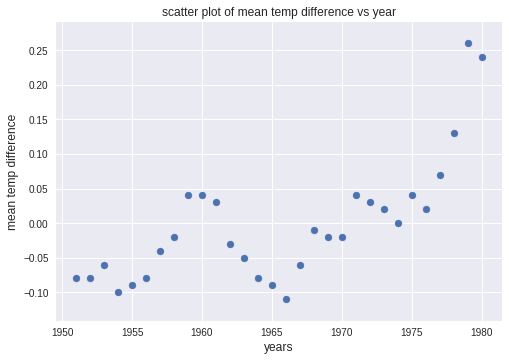

In [4]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

## Perform Linear Regression with Numpy
From the regression line, you can see that the difference between 30-year mean temperatures and 5-year mean temperatures is increasing over time. Most of the computational work required to generate the regression line was done by NumPy's polyfit function, which computed the values of m and b in the equation y = mx + b.

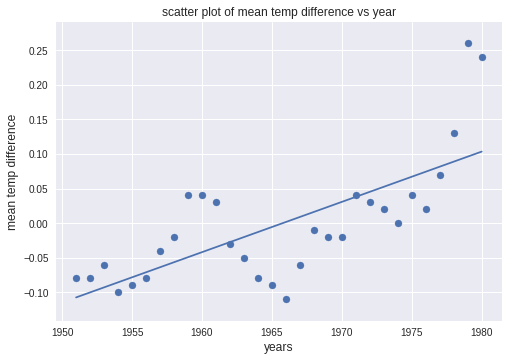

 y = 0.007279199110122247 * x + -14.309265850945273


In [5]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

## Perform Linear Regression with Scikit Learn
The output is almost identical to the output in the previous exercise. The difference is that scikit-learn did more of the work for you. Specifically, you didn't have to code a line function as you did with NumPy; scikit-learn's LinearRegression function did it for you. scikit-learn supports many different types of regression, which comes in handy when building sophisticated machine-learning models.

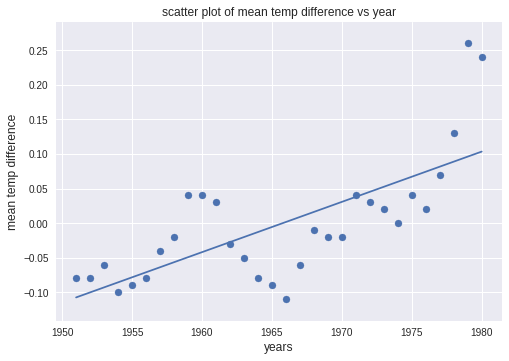

 y = 0.007279199110122357 * x + -14.309265850945492


In [6]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

## Analyze Data with Seaborn
One of the cool things about Azure Notebooks — and Python in general — is there are thousands of open-source libraries you can leverage to perform complex tasks without writing a lot of code. In this unit, you'll use Seaborn, a library for statistical visualization, to plot the second of the two data sets you loaded, which covers the years 1882 to 2014. Seaborn can create a regression line accompanied by a projection showing where data points should fall based on the regression with one simple function call.

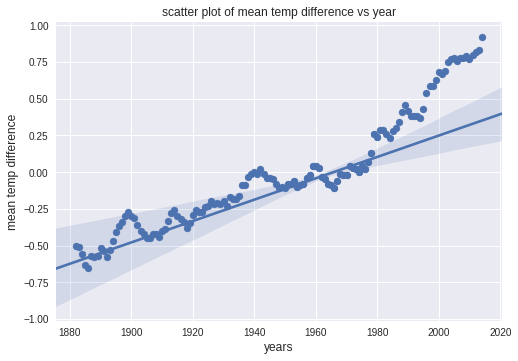

In [7]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()